# Data input

In [1]:
# Input libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from scipy import stats

In [2]:
range_w1600 = range(10,490,40)
range_w1600_large = range(10,490,80)

In [7]:
# index为实验编号，columns为充电桩数量

# 1600KVA
Em_w1600_oncc_25th = pd.DataFrame(index = range(1,31))
Em_w1600_oncc_avg = pd.DataFrame(index = range(1,31))
Em_w1600_oncc_75th = pd.DataFrame(index = range(1,31))
Em_w1600_oncc_total = pd.DataFrame(columns = range_w1600, index = ['25th','avg','75th'])
Em_w1600_ofcc_25th = pd.DataFrame(index=range(1,31))
Em_w1600_ofcc_avg = pd.DataFrame(index=range(1,31))
Em_w1600_ofcc_75th = pd.DataFrame(index=range(1,31))

for i in range_w1600:
    Em_w1600_oncc_25th[i] = pd.read_csv(f"./result/pareto_oncc/workplace/1600KVA/pareto_w1600_{i}_week_25th.csv",index_col = 0)['Em_reduce_%'].tolist()
    Em_w1600_oncc_avg[i] = pd.read_csv(f"./result/pareto_oncc/workplace/1600KVA/pareto_w1600_{i}_week.csv",index_col = 0)['Em_reduce_%'].tolist()
    Em_w1600_oncc_75th[i] = pd.read_csv(f"./result/pareto_oncc/workplace/1600KVA/pareto_w1600_{i}_week_75th.csv",index_col = 0)['Em_reduce_%'].tolist()
    Em_w1600_oncc_total.loc['25th',i] = pd.read_csv(f"./result/pareto_oncc/workplace/1600KVA/pareto_w1600_{i}_week_25th.csv",index_col = 0)['Em_reduce_kg'].sum()
    Em_w1600_oncc_total.loc['avg',i] = pd.read_csv(f"./result/pareto_oncc/workplace/1600KVA/pareto_w1600_{i}_week.csv",index_col = 0)['Em_reduce_kg'].sum()
    Em_w1600_oncc_total.loc['75th',i] = pd.read_csv(f"./result/pareto_oncc/workplace/1600KVA/pareto_w1600_{i}_week_75th.csv",index_col = 0)['Em_reduce_kg'].sum()
    Em_w1600_ofcc_25th[i] = pd.read_csv(f"./result/pareto_ofcc/workplace/1600KVA/pareto_w1600_{i}_week_25th.csv",index_col = 0)['Em_reduce_%'].tolist()
    Em_w1600_ofcc_avg[i] = pd.read_csv(f"./result/pareto_ofcc/workplace/1600KVA/pareto_w1600_{i}_week.csv",index_col = 0)['Em_reduce_%'].tolist()
    Em_w1600_ofcc_75th[i] = pd.read_csv(f"./result/pareto_ofcc/workplace/1600KVA/pareto_w1600_{i}_week_75th.csv",index_col = 0)['Em_reduce_%'].tolist()

    # element-wise subtraction
Em_w1600_gap_25th = Em_w1600_ofcc_25th.sub(Em_w1600_oncc_25th)
Em_w1600_gap_avg = Em_w1600_ofcc_avg.sub(Em_w1600_oncc_avg)
Em_w1600_gap_75th = Em_w1600_ofcc_75th.sub(Em_w1600_oncc_75th)

# Result

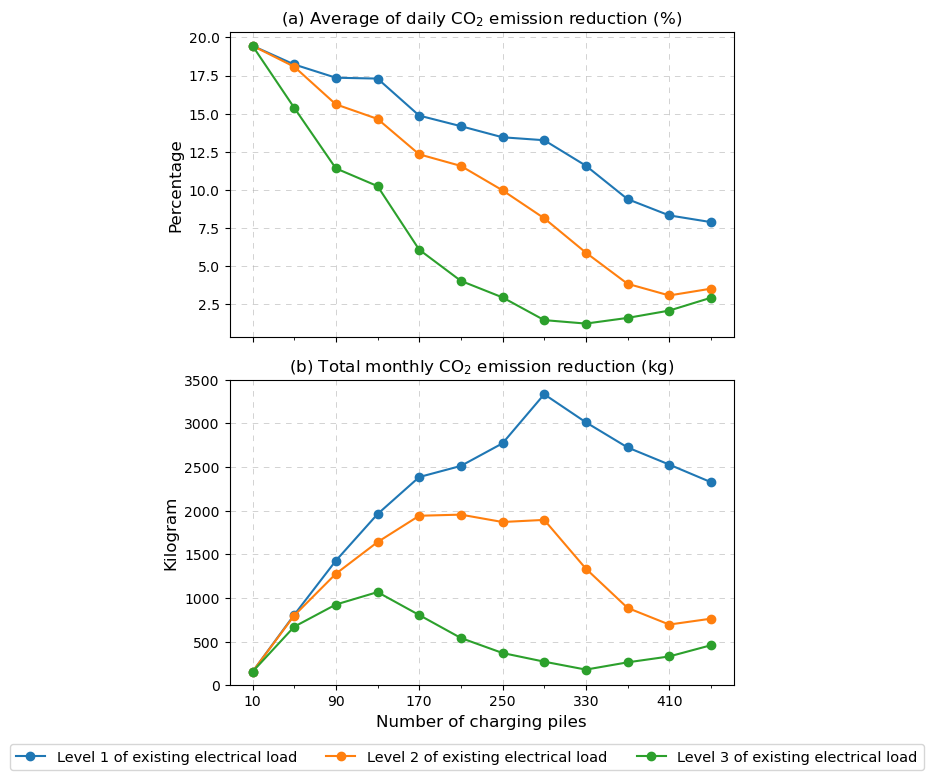

In [53]:
# Average CO2 emission reduction (%) and total CO2 emission reduction (kg) of ONCC under different number of chargers and existing electrical load
major_ticks = [10, 90, 170, 250, 330, 410]
minor_ticks = [50, 130, 210, 290, 370, 450]

# Create a figure and a grid of subplots
fig, axes = plt.subplots(ncols = 1, nrows = 2, sharex = True, sharey = False, figsize=(6, 7.5), tight_layout=True)

# plot the average CO2 emission reduction of ONCC under different number of chargers and existing electrical load
x = range_w1600
y1_1 = [Em_w1600_oncc_25th[i].mean() for i in Em_w1600_oncc_25th.columns]
y1_2 = [Em_w1600_oncc_avg[i].mean() for i in Em_w1600_oncc_avg.columns]
y1_3 = [Em_w1600_oncc_75th[i].mean() for i in Em_w1600_oncc_75th.columns]
axes[0].plot(x,y1_1,marker='o',label = 'Level 1 of existing electrical load')
axes[0].plot(x,y1_2,marker='o',label = 'Level 2 of existing electrical load')
axes[0].plot(x,y1_3,marker='o',label = 'Level 3 of existing electrical load')

# setting the x-axis and y-axis
axes[0].set_xticks(major_ticks)
axes[0].set_xticklabels([str(tick) for tick in major_ticks])
axes[0].set_xticks(minor_ticks, minor=True)
axes[0].set_ylabel('Percentage', fontsize = 12) 
axes[0].set_title('(a) Average of daily CO$_2$ emission reduction (%)')
axes[0].grid(True, which = 'major', axis = 'both', linestyle='--', linewidth = 0.4, dashes=(10,10))

# plot total CO2 emission reduction (kg) of ONCC under different number of chargers and existing electrical load
y2_1 = Em_w1600_oncc_total.loc['25th']
y2_2 = Em_w1600_oncc_total.loc['avg']
y2_3 = Em_w1600_oncc_total.loc['75th']
axes[1].plot(x,y2_1,marker='o',label = 'Level 1 of existing electrical load')
axes[1].plot(x,y2_2,marker='o',label = 'Level 2 of existing electrical load')
axes[1].plot(x,y2_3,marker='o',label = 'Level 3 of existing electrical load')

# setting the x-axis and y-axis
axes[1].set_xticks(major_ticks)
axes[1].set_xticklabels([str(tick) for tick in major_ticks])
axes[1].set_xticks(minor_ticks, minor=True)
axes[1].set_ylim(0,3500)
axes[1].set_xlabel('Number of charging piles', fontsize = 12)
axes[1].set_ylabel('Kilogram', fontsize = 12) 
axes[1].set_title('(b) Total monthly CO$_2$ emission reduction (kg)')
axes[1].grid(True, which = 'major', axis = 'both', linestyle='--', linewidth = 0.4, dashes=(10,10))
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.53, 0.01), ncol=3, fontsize = 10.5)

# save the figure
plt.savefig("./result/Figure/Emission_mitigation.svg",bbox_inches='tight')

# Show the plot
plt.show()

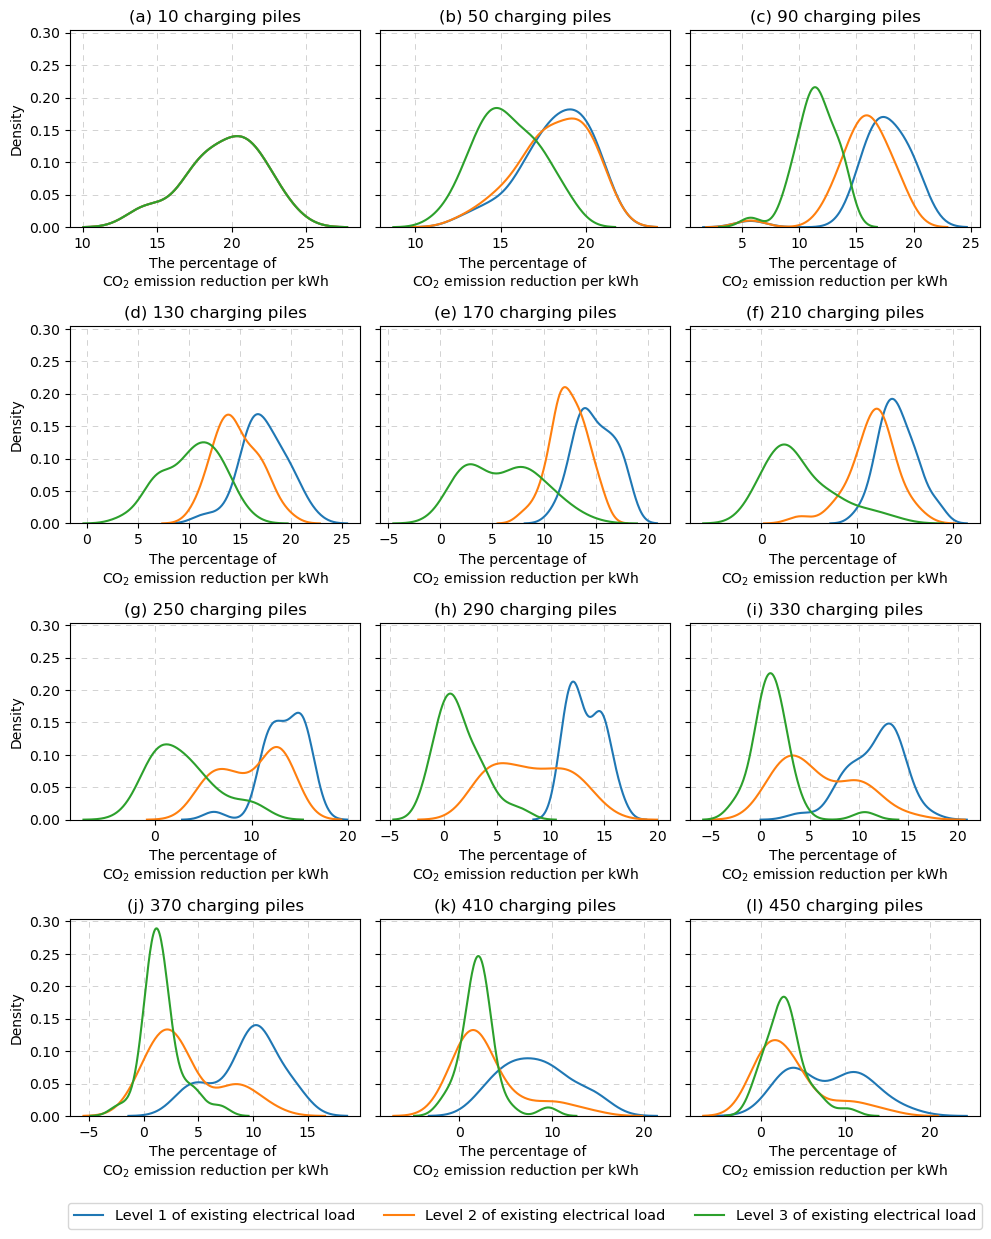

In [49]:
# Distribution of CO2 emission reduction of ONCC under different number of chargers and existing electrical load

# Create a figure and a grid of subplots
fig, axes = plt.subplots(ncols = 3, nrows = 4, sharex = False, sharey = True, figsize=(10, 12), tight_layout=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

list_subplot = ['a','b','c','d','e','f','g','h','i','j','k','l']

# Iterate through each column and plot the KDEs
for i, col in enumerate(Em_w1600_oncc_25th.columns):
    sns.kdeplot(Em_w1600_oncc_25th[col], ax=axes[i], label='Level 1 of existing electrical load'if i == 0 else "_nolegend_")
    sns.kdeplot(Em_w1600_oncc_avg[col], ax=axes[i], label='Level 2 of existing electrical load'if i == 0 else "_nolegend_")
    sns.kdeplot(Em_w1600_oncc_75th[col], ax=axes[i], label='Level 3 of existing electrical load'if i == 0 else "_nolegend_")
    axes[i].set_title(f'({list_subplot[i]}) {range_w1600[i]} charging piles')
    axes[i].set_xlabel('The percentage of \nCO$_2$ emission reduction per kWh')
    axes[i].grid(True, which = 'major', axis = 'both', linestyle='--', linewidth = 0.4, dashes=(10,10))

# Add a legend below the subplots
# The legend uses labels from the first subplot and assumes all subplots have the same labels.
# `bbox_to_anchor` arguments: (x0, y0, width, height), relative to the figure size
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.53, -0.001), ncol=3, fontsize = 10.5)

# save the figure
plt.savefig("./result/Figure/Emission_mitigation_kde.svg",bbox_inches='tight')

# Show the plot
plt.show()

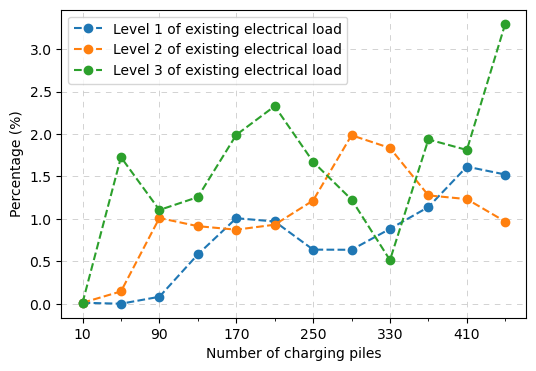

In [50]:
# Comparison between online and offline optimization
x_minor_locator=MultipleLocator(40)

# Create a figure
plt.figure(figsize=(6,4))

# plot the average gap in CO2 emission reduction between oncc and ofcc under different number of chargers and existing electrical load
x = range_w1600
y1 = [Em_w1600_gap_25th[i].mean() for i in Em_w1600_gap_25th.columns]
y2 = [Em_w1600_gap_avg[i].mean() for i in Em_w1600_gap_avg.columns]
y3 = [Em_w1600_gap_75th[i].mean() for i in Em_w1600_gap_75th.columns]
plt.plot(x,y1,marker='o',linestyle = '--', label = 'Level 1 of existing electrical load')
plt.plot(x,y2,marker='o',linestyle = '--', label = 'Level 2 of existing electrical load')
plt.plot(x,y3,marker='o',linestyle = '--', label = 'Level 3 of existing electrical load')
plt.grid(True, which = 'major', axis = 'both', linestyle='--', linewidth = 0.4, dashes=(10,10))

# setting the x-axis and y-axis
plt.xticks(ticks=[i for i in range_w1600_large])
plt.gca().xaxis.set_minor_locator(x_minor_locator)
plt.xticks(range_w1600, minor=True)
# plt.ylim(-0.4,3)
plt.xlabel('Number of charging piles')
plt.ylabel('Percentage (%)')
plt.legend()

# save the figure
plt.savefig("./result/Figure/Emission_mitigation_online_vs_offline.svg",bbox_inches='tight')

# show the figure
plt.show()

In [47]:
# t-test
def t_test(data1, data2, idx):
    # Initialize DataFrame for p-values
    df_p_value = pd.DataFrame(index=[idx], columns=data1.columns)
    
    for col in data1.columns:
        # Create a mask where both data1 and data2 are not NaN
        mask = ~data1[col].isna() & ~data2[col].isna()
        
        # Filter data using the mask
        filtered_data1 = data1[col][mask]
        filtered_data2 = data2[col][mask]

        # Check if there's enough data to perform t-test
        if len(filtered_data1) > 1 and len(filtered_data2) > 1:
            _, p_value = stats.ttest_ind(filtered_data1, filtered_data2)
            df_p_value.at[idx, col] = p_value  # Assign the float p-value directly
        else:
            df_p_value.at[idx, col] = np.nan  # Assign NaN if not enough data

    # Convert the DataFrame to float dtype if not already
    df_p_value = df_p_value.astype(float)
    
    return df_p_value

In [54]:
p_value_w1600_25th = t_test(Em_w1600_oncc_25th,Em_w1600_ofcc_25th,'Level 1 of existing electrical load')
p_value_w1600_25th

,10,50,90,130,170,210,250,290,330,370,410,450
Level 1 of existing electrical load,0.985107,0.998356,0.907131,0.315085,0.049641,0.063879,0.291557,0.168257,0.173424,0.134781,0.083335,0.176695


In [55]:
p_value_w1600_25th.dtypes

10     float64
50     float64
90     float64
130    float64
170    float64
210    float64
250    float64
290    float64
330    float64
370    float64
410    float64
450    float64
dtype: object

In [56]:
p_value_w1600_avg = t_test(Em_w1600_oncc_avg,Em_w1600_ofcc_avg,'Level 2 of existing electrical load')
p_value_w1600_avg

,10,50,90,130,170,210,250,290,330,370,410,450
Level 2 of existing electrical load,0.985107,0.786004,0.146802,0.106735,0.06986,0.140241,0.14326,0.023489,0.067014,0.194813,0.29545,0.480554


In [57]:
p_value_w1600_75th = t_test(Em_w1600_oncc_75th,Em_w1600_ofcc_75th,'Level 3 of existing electrical load')
p_value_w1600_75th

,10,50,90,130,170,210,250,290,330,370,410,450
Level 3 of existing electrical load,0.985107,0.001517,0.036171,0.062162,0.024444,0.019008,0.13001,0.166025,0.646602,0.275851,0.521335,0.269951


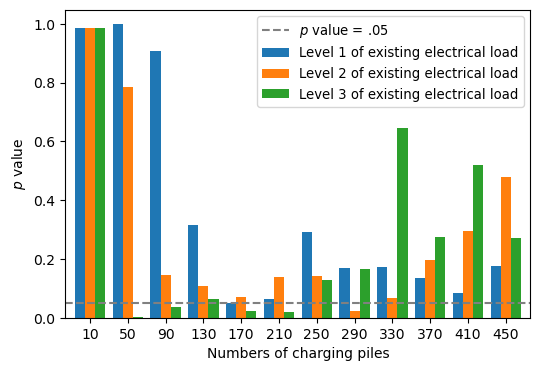

In [70]:
# Combine the DataFrames
p_value_w1600 = pd.concat([p_value_w1600_25th, p_value_w1600_avg, p_value_w1600_75th])

# Plotting the bar chart
ax = p_value_w1600.T.plot(kind='bar', figsize=(6, 4), width=0.8)
plt.ylabel(r'$\mathit{p}$ value')
plt.xlabel('Numbers of charging piles')
plt.xticks(rotation=0)

# Add a horizontal line as p-value = .05
reference_value = .05
plt.axhline(y=reference_value, color='grey', linestyle='--', label=r'$\mathit{p}$ value = .05')

# Show the legend
plt.legend(fontsize = 9.5)

# save the figure
plt.savefig("./result/Figure/ttest_online_vs_offline.svg",bbox_inches='tight')

# Display the plot
plt.show()